# Question 1: Bias-Variance (5 pts)

a) (**2 pts**) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

b) (**3 pts**) Use your own words to describe why there is a tradeoff between bias and variance. 

## Answer:

a)This function represents the difference between estimated value by the model and the true value at certain point $x_0$ from the generator fuction. This is the bias of the estimator at $x_0$.

b) Bias describes how good the average model is, which is quantitatively how far off your modeled mean vs true mean of samples, where variance describes how sensitive the model is to variations in data. When a model is simple (in the Lasso or Ridge case, regularization is high), the bias is high but the variance is low, where each variable is given low weights; whereas for high complexity models (in the Lasso or Ridge case, regularization is low), for example overfit models, variance is high but the bias is low where training samples were all given high weight. Expected loss (E[L]) = $bias^2$ + variance + noise, so at low model complexity, E(L) is dominated by bias where at high complexity, E[L] is dominated by variance. What we need to do is to find the Goldilocks zone between the trade offs when we build our models.

# Question 2: Bias-Variance exploration (20 pts)

We want to build a model that can predict y for unknown inputs x.

(a) (**10 pts**) Fit polynomial models of degrees 2, 4, 7 to the training data. Print out the mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (predictions on x_all by different models vs x_all), and the predictions on the test set (predictions on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled. **Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.


In [1]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline

data_load = np.load('D:\\05_GitHub\\Data_Science_Projects\\data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()

In [2]:
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)
x_all = np.linspace(-10,10,101).reshape(-1,1)

### Answer a:

In [ ]:
# Fit polynomial models of degrees 2, 4, 8 to the training data

poly2 = PolynomialFeatures(degree=2)
poly4 = PolynomialFeatures(degree=4)
poly7 = PolynomialFeatures(degree=7)

X_2_train = poly2.fit_transform(x_train)
X_4_train = poly4.fit_transform(x_train)
X_7_train = poly7.fit_transform(x_train)

X_2_test = poly2.fit_transform(x_test)
X_4_test = poly4.fit_transform(x_test)
X_7_test = poly7.fit_transform(x_test)

lrp2 = LinearRegression()
lrp2.fit(X_2_train, y_train)
y_2_train = lrp2.predict(X_2_train)
y_2_test = lrp2.predict(X_2_test)

lrp4 = LinearRegression()
lrp4.fit(X_4_train, y_train)
y_4_train = lrp4.predict(X_4_train)
y_4_test = lrp4.predict(X_4_test)


lrp7 = LinearRegression()
lrp7.fit(X_7_train, y_train)
y_7_train = lrp7.predict(X_7_train)
y_7_test = lrp7.predict(X_7_test)


df_train=pd.DataFrame(x_train)

df_train['y_train']   = y_train
df_train['y_2_train'] = y_2_train
df_train['y_4_train'] = y_4_train
df_train['y_7_train'] = y_7_train
df_train.columns=['x_train','y_train','y_2_train', 'y_4_train', 'y_7_train']
df_train.sort_values(by='x_train',inplace=True)

df_test=pd.DataFrame(x_test)

df_test['y_test'] = y_test
df_test['y_2_test'] = y_2_test
df_test['y_4_test'] = y_4_test
df_test['y_7_test'] = y_7_test
df_test.columns=['x_test','y_test','y_2_test', 'y_4_test', 'y_7_test']
df_test.sort_values(by='x_test',inplace=True)


In [ ]:
print('MSE for degree 2 polynomial on training data is: ', mse(y_train,y_2_train))
print('MSE for degree 4 polynomial on training data is: ', mse(y_train,y_4_train))
print('MSE for degree 7 polynomial on training data is: ', mse(y_train,y_7_train))
print('MSE for degree 2 polynomial on test data is: ', mse(y_test,y_2_test))
print('MSE for degree 4 polynomial on test data is: ', mse(y_test,y_4_test))
print('MSE for degree 7 polynomial on test data is: ', mse(y_test,y_7_test))

In [ ]:
#Plot all model predictions vs. test data

ax = plt.gca()

ax.plot(df_train['x_train'], df_train['y_train'],linestyle='None',marker= 'o', color='b',label='train_obs')
ax.plot(df_train['x_train'], df_train['y_2_train'],linestyle='-',color='m',label='2nd deg poly pred on train')
ax.plot(df_train['x_train'], df_train['y_4_train'],linestyle='-',color='c',label='4th deg poly pred on train')
ax.plot(df_train['x_train'], df_train['y_7_train'],linestyle='-',color='y',label='7th deg poly pred on tain')

ax.plot(df_test['x_test'], df_test['y_test'],linestyle='None',marker= 's', color='r',label='train_obs')
ax.plot(df_test['x_test'], df_test['y_2_test'],linestyle='-.',color='m',label='2nd deg poly pred on test')
ax.plot(df_test['x_test'], df_test['y_4_test'],linestyle='-.',color='c',label='4th deg poly pred on test')
ax.plot(df_test['x_test'], df_test['y_7_test'],linestyle='-.',color='y',label='7th deg poly pred on test')


ax.set_xscale('linear')
ax.set_xlim(ax.get_xlim()[::1])  # normal direction 
plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Model Comparison')
ax.legend()
plt.axis('tight')
plt.show()


(b) (**5 pts**) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.


As expected, for training data, 7th degree polynomial model gives the best result based on MSE, because when increasing model complexity and test the error on the data that was used to fit the model, you always get tighter 'fit' give you lower MSE with no penalty for overfitting. However, when you test your model with test data. you will see a trade off between bias and variance, when you look at the loss function loss (E[L]) = $bias^2$ + variance + noise, where when you cross the optimal complexity and complexity is too high for the given sample size, increased variance will increase with complexity resulting in higher predition error. For our case, 2nd degree and 7th degree polynomial fit gave higher MSE than 4th degree polynomial, which indicate that 4th degree polynomial fit is close to the optimal degree of model complexity for our data.

(c) (**5 pts**) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.
**You can use the following codes to load the dataset and complete the analysis**:

In [ ]:
def plot_curves(x_train,y_train, x_test, y_test):


        poly2 = PolynomialFeatures(degree=2)
        poly4 = PolynomialFeatures(degree=4)
        poly7 = PolynomialFeatures(degree=7)

        X_2_train = poly2.fit_transform(x_train)
        X_4_train = poly4.fit_transform(x_train)
        X_7_train = poly7.fit_transform(x_train)

        X_2_test = poly2.fit_transform(x_test)
        X_4_test = poly4.fit_transform(x_test)
        X_7_test = poly7.fit_transform(x_test)

        lrp2 = LinearRegression()
        lrp2.fit(X_2_train, y_train)
        y_2_train = lrp2.predict(X_2_train)
        y_2_test = lrp2.predict(X_2_test)

        lrp4 = LinearRegression()
        lrp4.fit(X_4_train, y_train)
        y_4_train = lrp4.predict(X_4_train)
        y_4_test = lrp4.predict(X_4_test)


        lrp7 = LinearRegression()
        lrp7.fit(X_7_train, y_train)
        y_7_train = lrp7.predict(X_7_train)
        y_7_test = lrp7.predict(X_7_test)
        
        df_train=pd.DataFrame(x_train)

        df_train['y_train']   = y_train
        df_train['y_2_train'] = y_2_train
        df_train['y_4_train'] = y_4_train
        df_train['y_7_train'] = y_7_train
        df_train.columns=['x_train','y_train','y_2_train', 'y_4_train', 'y_7_train']
        df_train.sort_values(by='x_train',inplace=True)

        df_test=pd.DataFrame(x_test)

        df_test['y_test'] = y_test
        df_test['y_2_test'] = y_2_test
        df_test['y_4_test'] = y_4_test
        df_test['y_7_test'] = y_7_test
        df_test.columns=['x_test','y_test','y_2_test', 'y_4_test', 'y_7_test']
        df_test.sort_values(by='x_test',inplace=True)


        ax = plt.gca()

        ax.plot(df_train['x_train'], df_train['y_train'],linestyle='None',marker= 'o', color='b',label='train_obs')
        ax.plot(df_train['x_train'], df_train['y_2_train'], linestyle='-',color='m',label='2nd deg poly pred on train')
        ax.plot(df_train['x_train'], df_train['y_4_train'], linestyle='-',color='c',label='4th deg poly pred on train')
        ax.plot(df_train['x_train'], df_train['y_7_train'], linestyle='-',color='y',label='7th deg poly pred on tain')

        ax.plot(df_test['x_test'], df_test['y_test'],linestyle='None',marker= 's', color='r',label='train_obs')
        ax.plot(df_test['x_test'], df_test['y_2_test'], linestyle='-.',color='m',label='2nd deg poly pred on test')
        ax.plot(df_test['x_test'], df_test['y_4_test'], linestyle='-.',color='c',label='4th deg poly pred on test')
        ax.plot(df_test['x_test'], df_test['y_7_test'], linestyle='-.',color='y',label='7th deg poly pred on test')


        ax.set_xscale('linear')
        ax.set_xlim(ax.get_xlim()[::1])  # normal direction 
        plt.rcParams["figure.figsize"] = (8,5)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Model Comparison')
        ax.legend()
        plt.axis('tight')
        plt.show()
        
        return mse(y_train,y_2_train),mse(y_test,y_2_test),mse(y_train,y_4_train),mse(y_test,y_4_test),mse(y_train,y_7_train),mse(y_test,y_7_test)

In [ ]:
print("20% data")
train2_rmses_20, test2_rmses_20, train4_rmses_20, test4_rmses_20,train7_rmses_20, test7_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train2_rmses_40, test2_rmses_40,train4_rmses_40, test4_rmses_40,train7_rmses_40, test7_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train2_rmses_60, test2_rmses_60,train4_rmses_60, test4_rmses_60,train7_rmses_60, test7_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train2_rmses_80, test2_rmses_80,train4_rmses_80, test4_rmses_80,train7_rmses_80, test7_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train2_rmses_100, test2_rmses_100,train4_rmses_100, test4_rmses_100,train7_rmses_100, test7_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

In [ ]:
mrse = pd.DataFrame({
                     'type':['train','train','train','test','test','test'],
                     '20% data':[np.log(train2_rmses_20), np.log(train4_rmses_20), np.log(train7_rmses_20),
                                 np.log(test2_rmses_20), np.log(test4_rmses_20), np.log(test7_rmses_20)],
                     '40% data':[np.log(train2_rmses_40), np.log(train4_rmses_40), np.log(train7_rmses_40),
                                 np.log(test2_rmses_40), np.log(test4_rmses_40), np.log(test7_rmses_40)],
                     '60% data':[np.log(train2_rmses_60), np.log(train4_rmses_60), np.log(train7_rmses_60),
                                 np.log(test2_rmses_60), np.log(test4_rmses_60), np.log(test7_rmses_60)],
                     '80% data':[np.log(train2_rmses_80), np.log(train4_rmses_80), np.log(train7_rmses_80),
                                 np.log(test2_rmses_80), np.log(test4_rmses_80), np.log(test7_rmses_80)],
                     '100% data':[np.log(train2_rmses_100), np.log(train4_rmses_100), np.log(train7_rmses_100),
                                  np.log(test2_rmses_100), np.log(test4_rmses_100), np.log(test7_rmses_100)],
                      },
                      index= ['degree=2 train', 'degree=4 train', 'degree=7 train',
                              'degree=2 test', 'degree=4 test', 'degree=7 test'])
plt.rcParams["figure.figsize"] = (15,15)
mrse.plot(kind='bar')

### Answer c

Overall, looking at this plot, we know that the performances of the models are not one-to-one across training and testing data. What this plot reveals is what we know about the bias-variance tradeoff.

For the least complex model, the second-degree polynomial, we see that there is a larger amount of bias, than the other models, in keeping with what we know about the bias-variance tradeoff. We see that for the most complex model (the seventh-degree polynomial), that on the train data, as the percentage of data increases, so does the MSE and on the test data, as the percentage of data increases, the MSE decreases. What this is saying is that there is lower bias, but higher variance compared to the other (less complex) models. Finally, the model that strikes a more optimal balance between the two in the tradeoff is the mid-most complex model, the fourth-degree polynomial. 

A key takeaway is that as the data size increases, the variance decreases across all models. This is because the models can better learn patterns that will perform well on unseen data. 

# Question 3: Gradient descent (5 pts)

a) (**2 pts**) Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.

b) (**3 pts**) Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: **How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**


## Answer:

### a

In both gradient descent (GD) and stochastic gradient descent (SGD), a set of model parameters are updated iteratively to minimize an error function. While in GD, you have to run through ALL the samples in your training set to do a single update for a parameter in a particular iteration, in SGD, on the other hand, you use ONLY ONE or SUBSET of training sample from your training set to do the update for a parameter in a particular iteration. Thus, if the number of training samples are large, using gradient descent may take too long because in every iteration when you are updating the values of the parameters, you are running through the complete training set. Further, gradient descent can take too long if the learning late is too low. If it's too high, gradient descent will vary and possibly not converge. On the other hand, using SGD will be faster because you use only one training sample and it starts improving itself right away from the first sample. However, because the SGD updates for every instance in an "on-line" version, if there are very frequent updates, SGD can become computationally expensive. And, SGD is more expensive when applied to very simple models on very small datasets. SGD often converges much faster compared to GD but the error function is not as well minimized as in the case of GD. Often in most cases, the close approximation that you get in SGD for the parameter values are enough because they reach the optimal values and keep oscillating there.

### b

'Nelder-Mead' method is the algorithm to find the minimum of a function by taking repeated steps down towards minima, and dynamically adjusts the step size based off the loss of the new point. If the new point is better than any previously seen value, it expands the step size to accelerate towards the bottom. Likewise if the new point is worse it contracts the step size to converge around the minima. This method can be easily extended into higher dimensional examples, all that's required is taking one more point than there are dimensions, reflecting the worst point around the rest of the points to take a step down.

The biggest downside of 'Nelder-Mead' as a direct search method is to deal with high dimensional functions as it's exponentially more difficult to figure out the 'direction' when dimentionality grows. As the result, 'Nelder-Mead' performs well on 1 and 2 dimensional data, however, it won't work well on even simple problems with more than a dozen or so parameters, not to mention models with millions if not billions of parameters.

# Question 4: Stochastic gradient descent (10 pts)

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

## Answer:

For linear regression

$\hat{Y} = \hat{\beta}_{0} + \sum \limits _{j=1} ^{n} X_{j}\hat{\beta}_{j} $    ..........(1)

Here $n=3$ where

equation (1) becomes

$\hat{Y} = \sum \limits _{j=0} ^{3} X_{j}\hat{\beta}_{j} $    ..........(2)

where x0=1



(2) can be written as matrix form

$\hat{Y}=W*X^T$ Where


$$W=\begin{bmatrix} {\beta}_{0} & {\beta}_{1} & {\beta}_{2} & {\beta}_{3} \end{bmatrix}$$ and $$X=\begin{bmatrix} 1 & x1 & x1x2 & e^{-x_1} \end{bmatrix}$$      


Using simple square error loss function J to minimize J by updating ${\beta}_{j}$

$J(x,y,{\beta})= \sum \limits _{j=0} ^{3} (x_{j}{\beta}_{j}-y_{j})^2 $ ...........................(3)



Gradient is

$\frac {dJ}{dW}= 2\sum \limits _{j=0} ^{3} (x_{j}{\beta}_{j}-y_{j})x_{j} $  ..........................(4)



In matrix form, gradient $\eta$

$\eta=(\hat{y}_{i}-y_{i})X$


For SGD, we want to get the gradient of W from partial partial differentiation of ${\beta}_{j}$ updated from iterating each additional sample by regulating gradient with a learning rate $\alpha$

so each of the 500 samples (denoted as i here)

${\beta}_{i+1}={\beta}_{i}-{\alpha}\frac {dJ}{\beta}$


${\beta}_{i+1}={\beta}_{i}-{\alpha}\sum \limits _{j=0} ^{3} (x_{ij}{\beta}_{j}-y_{ij})x_{ij}$


In our specific case, for each sample i:

${\beta}_{0(i+1)} ={\beta}_{0i)}+{\alpha}{\beta}_{0}x0_i$

Since X0=1, so for each sample i

${\beta}_{0(i+1)} ={\beta}_{0i}-{\alpha}(\hat{y}_{i}-y_{i})$

And 

$\\{\beta}_{1(i+1)} ={\beta}_{1i}-{\alpha}(\hat{y}_{i}-y_{i})*x1_{i}$
$\\{\beta}_{2(i+1)} ={\beta}_{2i}-{\alpha}(\hat{y}_{i}-y_{i})*x2_{i}$
$\\{\beta}_{3(i+1)} ={\beta}_{3i}-{\alpha}(\hat{y}_{i}-y_{i})*x3_{i}$

in vector form

$W_{i+1}=W_i-{\alpha}\eta$

Where $\eta=(\hat{y}_{i}-y_{i})X$

So $W_{i+1}=W_i-{\alpha}(\hat{y}_{i}-y_{i})X$






For Ridge Model (3) becomes

$J(x,y,{\beta})= \sum \limits _{j=0} ^{3} (x_{j}{\beta}_{j}-y_{j})^2 + {\lambda}\sum \limits _{j=1} ^{3}{\beta}_j^2$ ... (5)

where ${\lambda}$ is the regulation factor

(4) becomes


$\frac {dJ}{dW}= \sum \limits _{j=0} ^{3} (x_{j}{\beta}_{j}-y_{j})x_{j} + {\lambda}\sum \limits _{j=1} ^{3}{\beta}_j$  ..........................(6)


where constant 2 can be omitted

Since X0=1, so for each sample i, we dont need to regulate ${\beta}_{0}$

${\beta}_{0(i+1)} ={\beta}_{0i}-{\alpha}(\hat{y}_{i}-y_{i})$

And 

$\\{\beta}_{1(i+1)} ={\beta}_{1(i)}-{\alpha}[(\hat{y}_{i}-y_{i})*x1_{i}+{\lambda}{\beta}_{1i}]$
$\\{\beta}_{2(i+1)} ={\beta}_{2(i)}-{\alpha}[(\hat{y}_{i}-y_{i})*x2_{i}+{\lambda}{\beta}_{2i}]$
$\\{\beta}_{3(i+1)} ={\beta}_{3(i)}-{\alpha}[(\hat{y}_{i}-y_{i})*x3_{i}+{\lambda}{\beta}_{3i}]$


In vector form, update W

$W_{i+1}=W_{i}-\alpha\eta$

Where gradient $\eta$

$\eta=(\hat{y}_{i}-y_{i})X_{i}+{\lambda}W^{*}_{i}$

where here because $W_{0}={\beta}_{0}$ is not regulated so  $W_{0}$ is set to be 0 noted as $W^{*}$



# Question 5: Stochastic gradient descent coding (20 pts)

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) (**15 pts**) Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) (**5 pts**) Report the MSE of the two best combinations of learning rate and regularization constant.

In [2]:
import numpy as np
import math
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier

In [5]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        self.coef = self.coef - self.learning_rate * gradient
                   
    
    def fit(self, X, y, update_rule='sgd', plot=True):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
        
            for i in range(X.shape[0]):
                
                # Compute error
                   #please put your codes here
                yhat=self.linearPredict(X[i,:])
                error = yhat - y[i]
                # Compute gradients
                    #please put your codes here
                gradient= np.dot(error,X[i,:])+ np.append(np.zeros((1,1)),np.dot(self.regularization, self.coef[1:]))
            
                # Update weights
                self.sgd(gradient)
                
 #Go through each sample to update weight matrix using gradient and learning rate
                     
            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):
        #compute the dot product of self.coef and X
        return np.dot(self.coef,X.T) #this line is just a placeholder, please delete this line in your code

In [14]:
# Define X and y matrix
df=pd.read_csv('D:\\05_GitHub\\Data_Science_Projects\\Advanced_Machine_Learning\\SGD_samples-1.csv')
y=np.array(df['y'])
X=np.array(df[['x1','x2']])

n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

mse_comp=pd.DataFrame(np.zeros((len(learning_rate)*len(regularization),3)))
row=0

for l_rate in learning_rate:
    for regular in regularization:
        Reg=Regression(learning_rate=l_rate, regularization=regular, n_epoch=1000)
        Reg.fit(X, y, plot=False)
        mse_comp.iloc[row,0]=l_rate
        mse_comp.iloc[row,1]=regular
        mse_comp.iloc[row,2]=Reg.lowest_mse
        row+=1

<ipython-input-5-091fbf17dc96>:17: RuntimeWarning: invalid value encountered in subtract
  self.coef = self.coef - self.learning_rate * gradient
<ipython-input-5-091fbf17dc96>:43: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
<ipython-input-5-091fbf17dc96>:17: RuntimeWarning: overflow encountered in multiply
  self.coef = self.coef - self.learning_rate * gradient


In [8]:
mse_comp.columns=['learning_rate','regulation','lowest_mse']
mse_comp.dropna().sort_values(by='lowest_mse',ascending=True)

,learning_rate,regulation,lowest_mse
3,0.0010,0.0,0.027360
6,0.0100,0.0,0.027360
0,0.0001,0.0,0.027415
9,0.1000,0.0,0.030858
1,0.0001,10.0,0.033694
4,0.0010,10.0,0.033706
2,0.0001,100.0,0.033787
5,0.0010,100.0,0.033796
8,0.0100,100.0,0.033812
7,0.0100,10.0,0.033824


**a**

In [9]:
plt.rcParams["figure.figsize"] = (8,6)

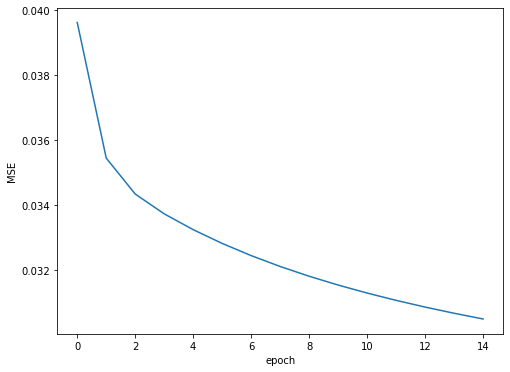

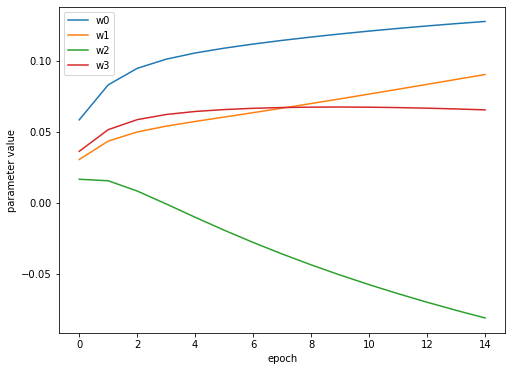

In [10]:
Reg=Regression(learning_rate=0.0010, regularization=0, n_epoch=n_epochs)
Reg.fit(X, y, plot=True)

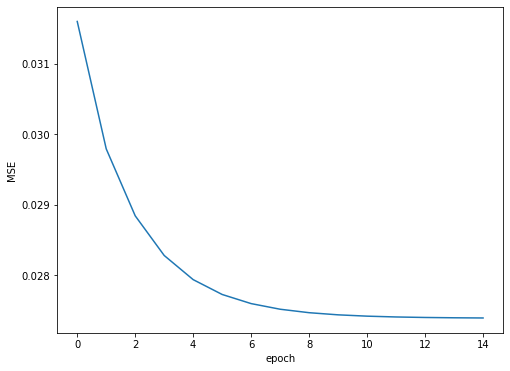

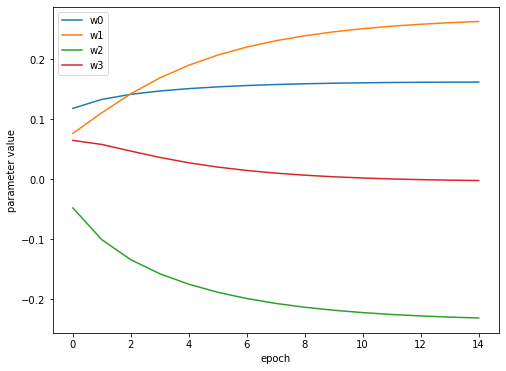

In [11]:
Reg=Regression(learning_rate=0.01, regularization=0, n_epoch=n_epochs)
Reg.fit(X, y, plot=True)

**b**

In [12]:
print('First Best Combination: Learning Rate of 0.0010 and Regularization of 0')
print('Second Best Combination: Learning Rate of 0.010 and Regularization of 0')

First Best Combination: Learning Rate of 0.0010 and Regularization of 0
Second Best Combination: Learning Rate of 0.010 and Regularization of 0
